In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import os

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100
plt.style.use("bmh")

In [3]:
os.chdir("..")

In [56]:
df = pd.read_csv('data/precleaned.csv', index_col=0)

In [11]:
df.head()

,wiek,zawod,stan_cywilny,wyksztalcenie,ma_kredyt,kredyt_mieszkaniowy,ma_pozyczke,sposob_kontaktu,miesiac,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wynik_poprzedniej_kampanii,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Quickstart
1. [Import danych](#Import-danych-i-podstawowe-informacje-o-zbiorze)
2. [Wykresy](#Wykresy-i-wnioski-przyblizajace-zbior-danych)
3. [Potencjalne pytania](#Pytania,-ktore-moga-potencjalnie-naprowadzic-na-cechy,-ktore-maja-wieksze-znaczenie-dla-predykcji-targetu)
4. [Key takeaways](#Key-takeaways)

# Detekcja wartosci odstajacych

In [61]:
df.describe()

,wiek,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
count,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000,40806.000000
mean,39.674288,258.182179,2.573543,964.105744,0.168137,0.103767,93.579566,-40.538908,3.645911,5168.279535,0.109249
std,9.782645,259.729251,2.777705,182.844467,0.485178,1.559143,0.575399,4.584551,1.722512,71.261768,0.311955
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,71.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [15]:
subset = df.select_dtypes(exclude='object')

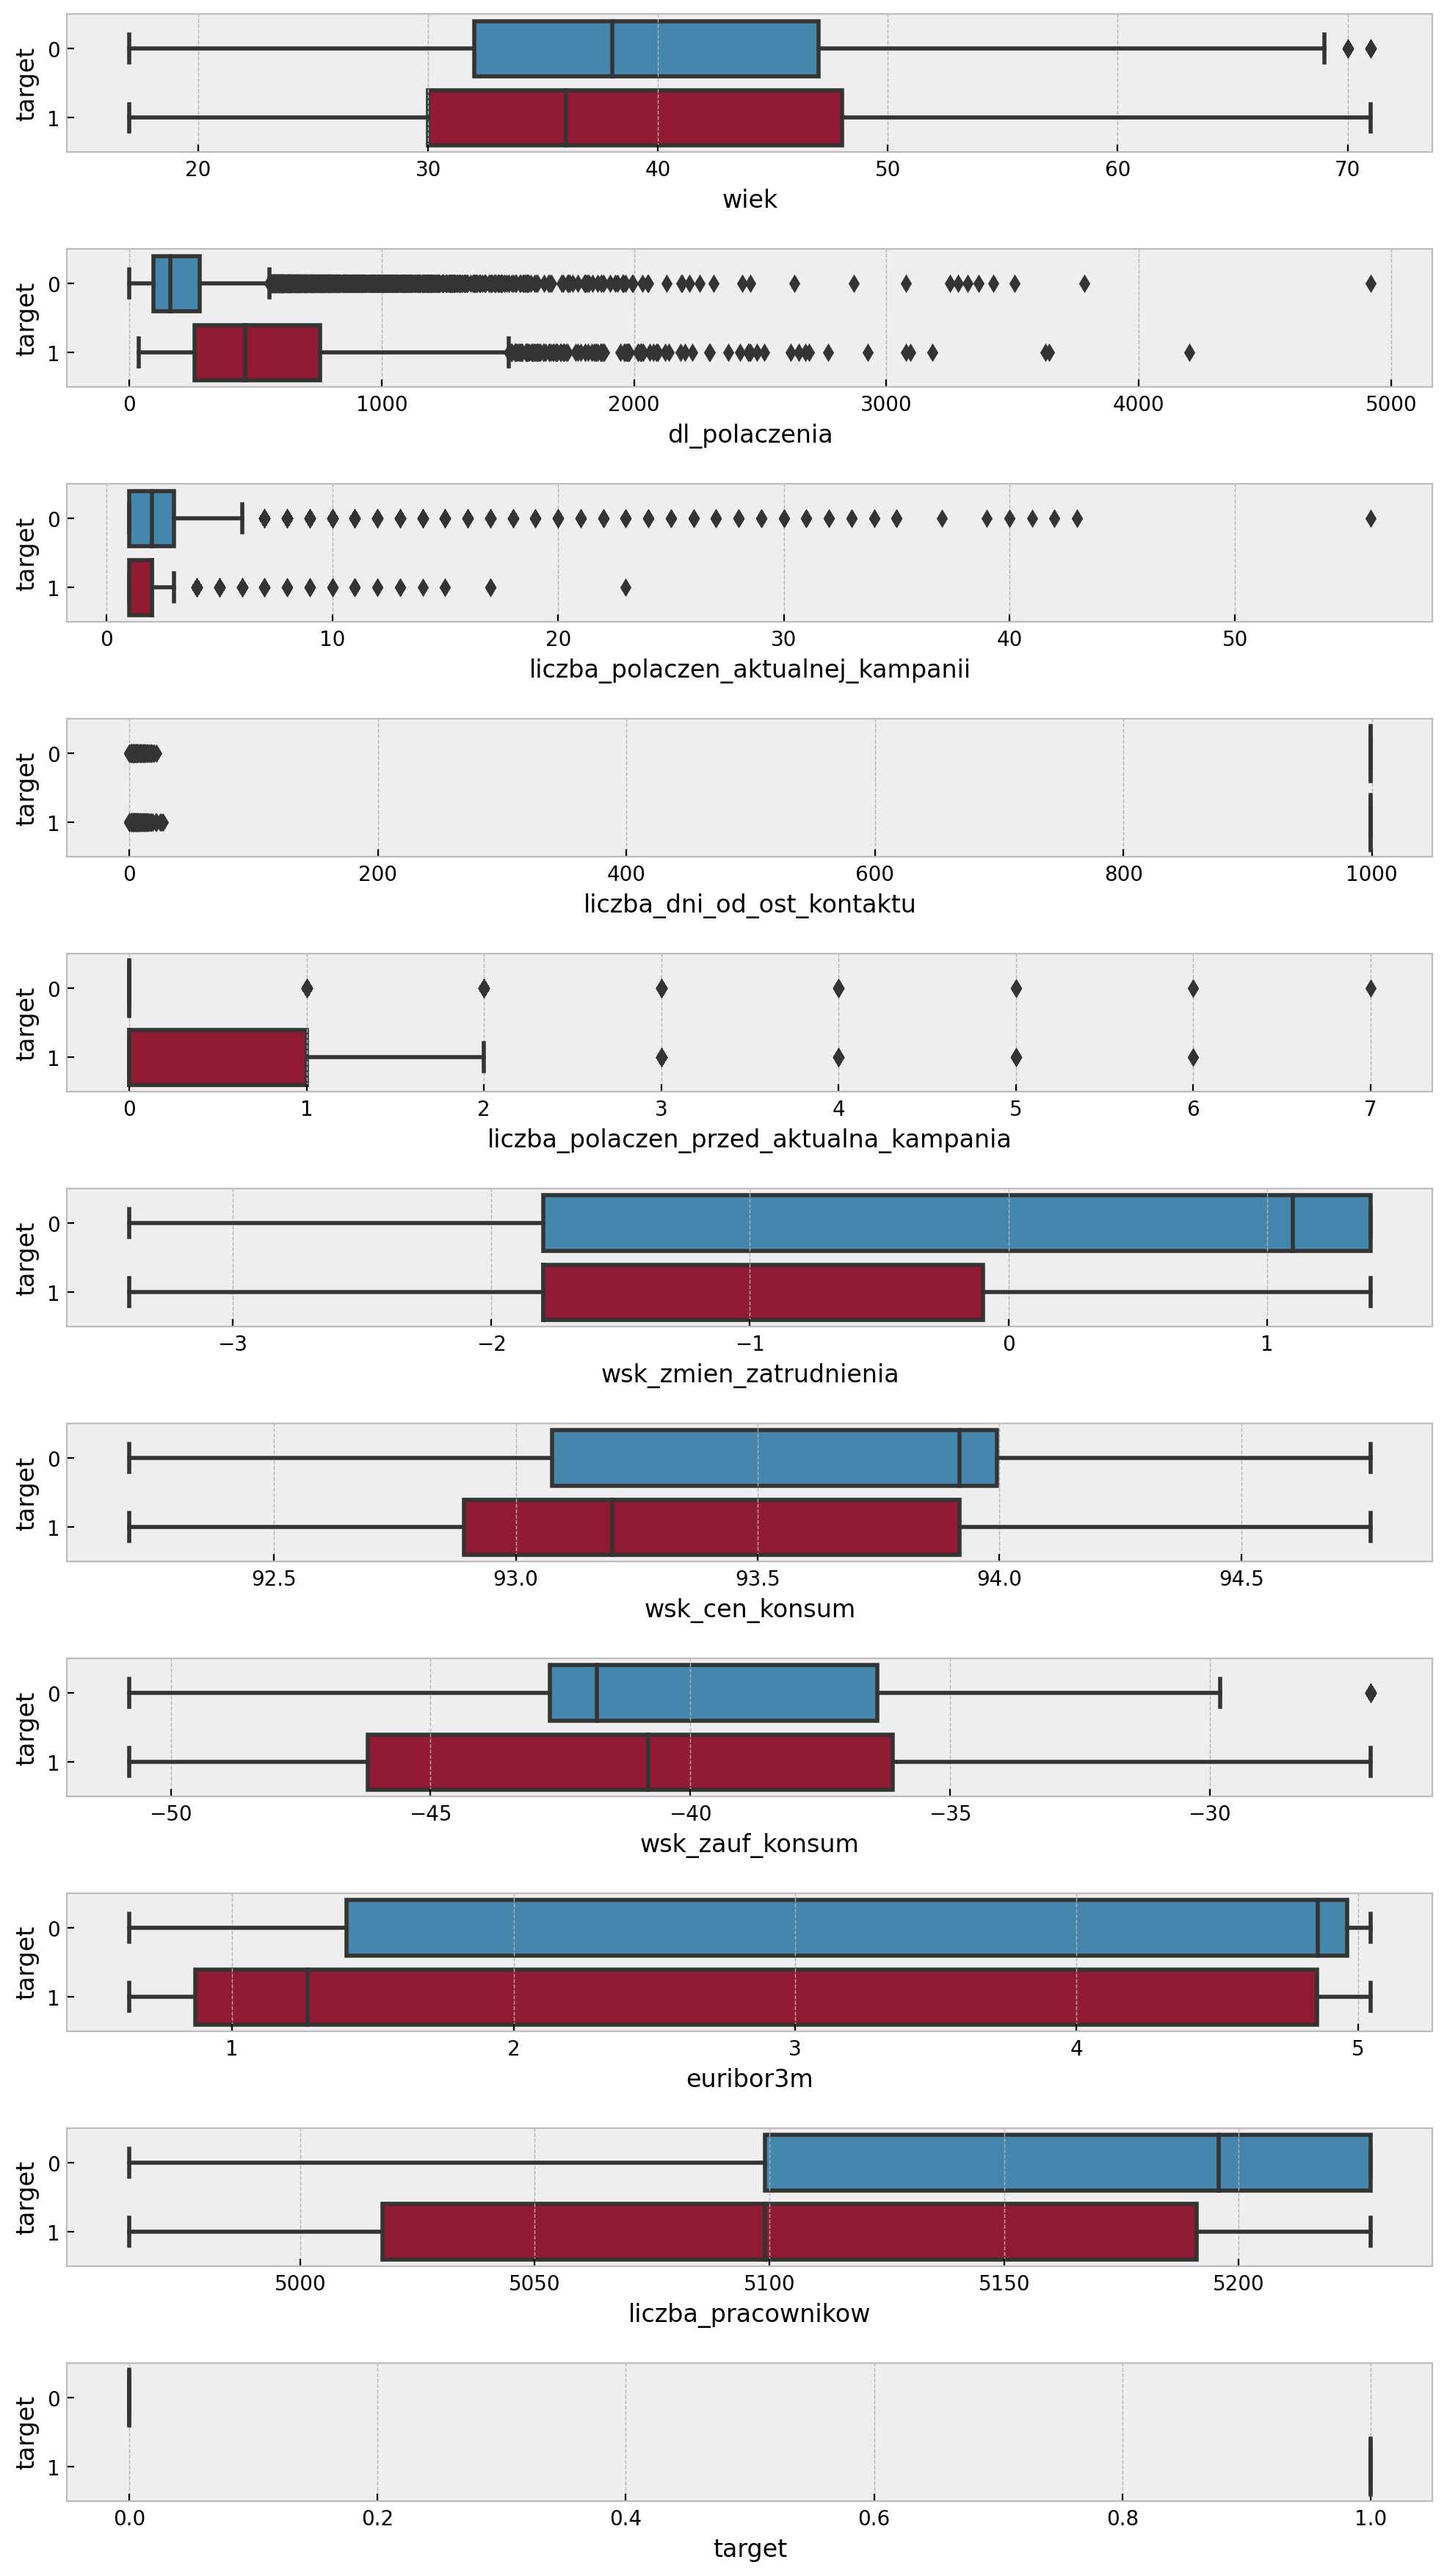

In [60]:
fig, axs = plt.subplots(len(subset.columns), dpi=200, figsize=(12,22))

for ind, feature in enumerate(subset.columns):
    sns.boxplot(data=df, x=df[feature], y='target', ax=axs[ind],orient='h')
    
plt.subplots_adjust(hspace=0.7)

### Wiek

<AxesSubplot:title={'center':'Zscore dla wieku'}, ylabel='Frequency'>

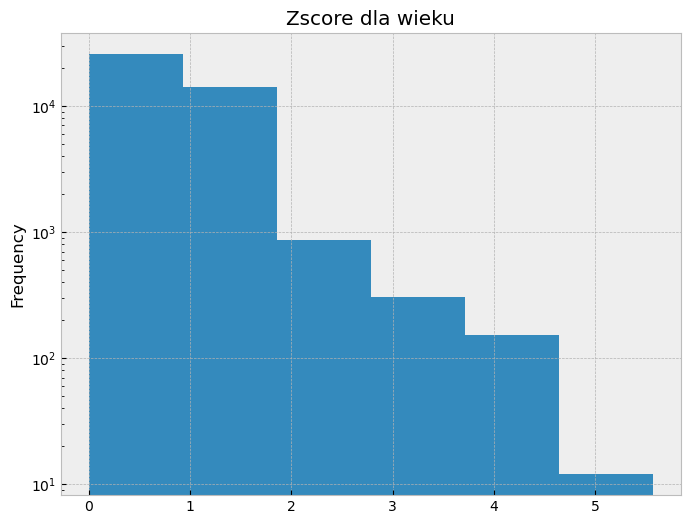

In [43]:

wiek_subset = np.abs(stats.zscore(df['wiek']))
wiek_subset.plot(kind='hist', bins=6, logy=True, title='Zscore dla wieku');

In [57]:
threshold = 3
df = df.iloc[np.where(wiek_subset <= threshold)[0]]

### Duration

<AxesSubplot:xlabel='dl_polaczenia', ylabel='Count'>

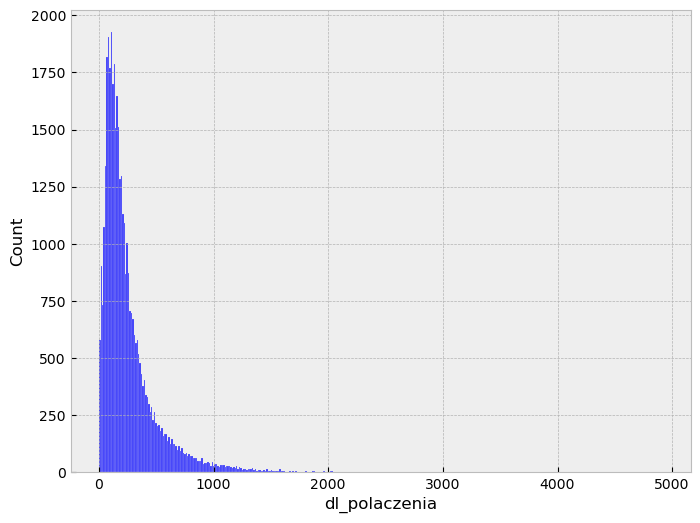

In [74]:
sns.histplot(data=df.dl_polaczenia)

In [67]:
(df.dl_polaczenia <= 0).sum()

4

In [68]:
df = df[~(df.dl_polaczenia <= 0)]

In [71]:
subset = stats.boxcox(df['dl_polaczenia'])[0]

(40802,)

<AxesSubplot:ylabel='Count'>

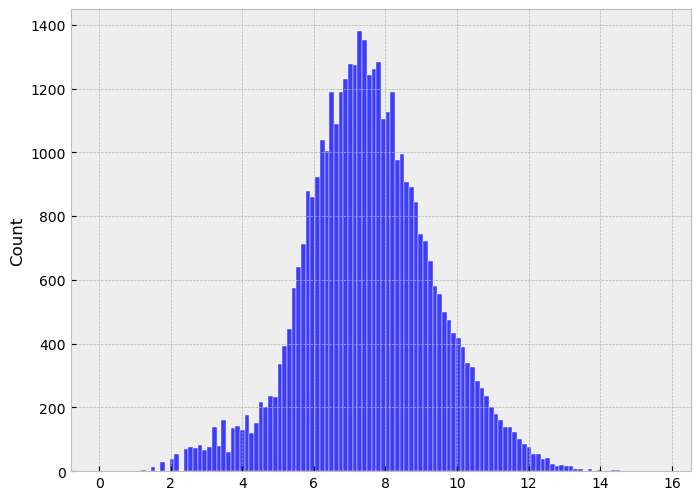

In [73]:
sns.histplot(data=subset)